# Trabalho 1
---

Este trabalho consiste em explorar um conjunto de dados de doenças cardíacas (arquivo `heart.csv`). O trabalho deve ser relizado em **duplas**.


O conjunto de dados de doenças cardíacas é formado por 303 observações (instâncias) e contém o seguintes atributos (todos numéricos):

| Atributo | Descrição |
| :--|:--|
|`age`| Age, in years|
|`sex`|`0` = female<br>`1` = male|
|`cp`| Chest pain type (0-3)|
|`trestbps`|Resting blood pressure<br>(in mm Hg on admission to the hospital)|
|`chol`| Serum cholesterol in mg/dl|
|`fbs`|Fasting blood sugar > 120 mg/dl<br>`1` = true<br>`0` = false|
|`restecg`| Resting electrocardiographic results|
|`thalach`| Maximum heart rate achieved|
|`exang`| Exercise induced angina<br>`1` = yes<br>`0` = no|
|`oldpeak`| ST depression induced by exercise relative to rest|
|`slope`| The slope of the peak exercise ST segment|
|`ca`| Number of major vessels (0-4) colored by flouroscopy|
|`thal`|`0`= N/A<br>`1` = normal<br>`2` = fixed defect<br>`3` = reversable defect|
|`target`|`0` = no presence of heart disease<br>`1` = presence of heart disease|


Nas células abaixo, existem questões específicas sobre o conjunto de dados que devem ser respondidas.

**Não é permitido importar nenhum módulo além dos que estão importados na célula abaixo.**

### Entrega

Após responder todas as questões, vocês devem certificar que seu Notebook está salvo com suas alterações (basta pressionar `ctrl + s` para salvar). Após salvar suas alterações, vocês devem realizar a entrega na sala de entrega do Moodle. A entrega deve ser feita da seguinte maneira:
- Deve ser entregue um arquivo `zip` contendo este Notebook com as questões respondidas. O nome do arquivo deve seguir o padrão: `NomeSobrenome_NomeSobrenome.zip`
- **Apenas um aluno da dupla deve fazer a entrega.**


### Critérios de avaliação

Cada questão será avaliada de acordo com os seguintes critérios:
- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import csv

## Questão 1 (1.0 pts)

Leia o arquivo `heart.csv` e imprima os seguintes dados sobre cada atributo (exceto o atributo alvo/target):
- Valor mínimo e máximo
- Valor médio
- Desvio padrão
- Mediana

In [3]:
########################
# Inicio do seu codigo #
########################

dataset = {}

with open('heart.csv', 'r') as heart:
    arq = csv.reader(heart)
        
    for i, row in enumerate(arq):

        if i == 0:
            for atributo in row:
                dataset[atributo] = []
                
        if i > 0:
            for j, key in enumerate(dataset.keys()):
                if j != 9:
                    dataset[key].append(int(row[j]))
                else:
                    dataset[key].append(float(row[j]))

for key in dataset.keys():
    dataset[key] = np.array(dataset[key])

for key in dataset.keys():
    if key == 'target':
        continue
    
    print('Atributo {}:'.format(key))
    print('O valor mínimo é {} e o valor máximo é {}'.format(np.min(dataset[key]), np.max(dataset[key])))
    print('O valor médio é {}'.format(np.mean(dataset[key])))
    print('O desvio padrão é {}'.format(np.std(dataset[key])))
    print('A mediana é {}'.format(np.median(dataset[key])))
    print()

########################
#   Fim do seu codigo  #
########################

Atributo age:
O valor mínimo é 29 e o valor máximo é 77
O valor médio é 54.366336633663366
O desvio padrão é 9.067101638577872
A mediana é 55.0

Atributo sex:
O valor mínimo é 0 e o valor máximo é 1
O valor médio é 0.6831683168316832
O desvio padrão é 0.46524119304834577
A mediana é 1.0

Atributo cp:
O valor mínimo é 0 e o valor máximo é 3
O valor médio é 0.966996699669967
O desvio padrão é 1.0303480250839463
A mediana é 1.0

Atributo trestbps:
O valor mínimo é 94 e o valor máximo é 200
O valor médio é 131.62376237623764
O desvio padrão é 17.509178065734393
A mediana é 130.0

Atributo chol:
O valor mínimo é 126 e o valor máximo é 564
O valor médio é 246.26402640264027
O desvio padrão é 51.74515101045713
A mediana é 240.0

Atributo fbs:
O valor mínimo é 0 e o valor máximo é 1
O valor médio é 0.1485148514851485
O desvio padrão é 0.3556096038825341
A mediana é 0.0

Atributo restecg:
O valor mínimo é 0 e o valor máximo é 2
O valor médio é 0.528052805280528
O desvio padrão é 0.5249911240963

## Questão 2 (1.0 pts)

Plote dois gráficos de histograma, um para o atributo `trestbps` e outro para `thalach`.
- Estes gráficos devem estar na mesma imagem, lado a lado (`trestbps` à esquerda e `thalach` à direita), compartilhando o eixo Y.
- O número de `bins` deve ser 10 para `threstbps` e 15 para `thalach`.
- Pinte as barras do gráfico pertencente à variável `trestbps` de vermelho.

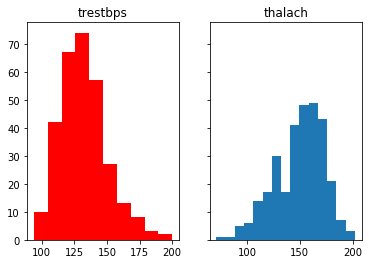

In [4]:
########################
# Inicio do seu codigo #
########################

fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].hist(dataset['trestbps'], bins=10, color='red')
axes[0].set_title('trestbps')

axes[1].hist(dataset['thalach'], bins=15)
axes[1].set_title('thalach')

plt.show()

########################
#   Fim do seu codigo  #
########################

## Questão 3 (3.0 pts)

Realize as seguintes operações sobre os atributos idade (`age`) e colesterol (`chol`):
1. Plotar um gráfico de dispersão com o atributo colesterol no eixo X e a idade no eixo Y. Utilize o atributo target para colorir os pontos de acordo com a sua classe (escolha duas cores diferentes).
2. Normalize os atributos idade (`age`) e colesterol (`chol`) utilizando a estratégia `MinMax`. A normalização MinMax é dada pela fórmula abaixo:
$$x^{(i)}_{norm}=\frac{x^{(i)} - x^{(i)}_{min}}{x^{(i)}_{max} - x^{(i)}_{min}}$$

Onde $x^{(i)}_{norm}$ é o atributo $x^{(i)}$ do conjunto de dados normalizado.

3. Após normalizar os atributos, faça a plotagem do passo 1 novamente, agora com os atributos normalizados.

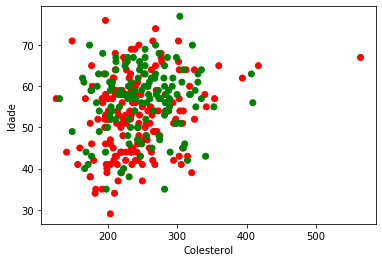

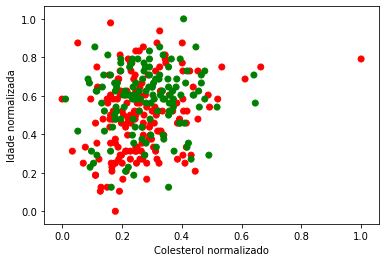

In [5]:
########################
# Inicio do seu codigo #
########################

# Parte 1

mask = dataset['target'] == 0
colors_target = np.where(mask, 'green', 'red')

fig, ax = plt.subplots()

ax.scatter(x=dataset['chol'], y=dataset['age'], c=colors_target)
ax.set_xlabel('Colesterol')
ax.set_ylabel('Idade')

plt.show()

# Parte 2

age_norm = (dataset['age'] - np.min(dataset['age'])) / (np.max(dataset['age']) - np.min(dataset['age']))
chol_norm = (dataset['chol'] - np.min(dataset['chol'])) / (np.max(dataset['chol']) - np.min(dataset['chol']))

# Parte 3

fig, ax = plt.subplots()

ax.scatter(x=chol_norm, y=age_norm, c=colors_target)
ax.set_xlabel('Colesterol normalizado')
ax.set_ylabel('Idade normalizada')

plt.show()

########################
#   Fim do seu codigo  #
########################

## Questão 4 (2.5 pts)

Responda as perguntas abaixo sobre o conjunto de dados:

1. Quantas das pessoas do conjunto de dados apresentam doença no coração? Apresente esse número como total e separado por sexo.
1. Quantos homens têm dores no peito (`cp`) do tipo 2 ou do tipo 3?
1. Quantas pessoas entre 40 e 60 anos (`age`), com colesterol acima de 200 (`chol`) possuem doença no coração?


In [6]:
########################
# Inicio do seu codigo #
########################

# Parte 1

total_doentes = np.sum(dataset['target'] == 1)
feminino_doentes = np.sum((dataset['target'] == 1) & (dataset['sex'] == 0))
masculino_doentes = np.sum((dataset['target'] == 1) & (dataset['sex'] == 1))

print('{} pessoas do conjunto de dados apresentam doença no coração, sendo {} do sexo feminino e {} do sexo masculino'
      .format(total_doentes, feminino_doentes, masculino_doentes))

# Parte 2

dores_homens = np.sum((dataset['sex'] == 1) & ((dataset['cp'] == 2) | (dataset['cp'] == 3)))

print('{} homens têm dores no peito do tipo 2 ou do tipo 3'.format(dores_homens))

# Parte 3

pessoas_4060 = (dataset['age'] >= 40) & (dataset['age'] <=60)
doentes_4060 = np.sum((pessoas_4060) & ((dataset['chol'] > 200) & (dataset['target'] == 1)))

print('{} pessoas com idade entre 40 e 60 anos e com colesterol acima de 200 possuem doença no coração'.format(doentes_4060))

########################
#   Fim do seu codigo  #
########################

165 pessoas do conjunto de dados apresentam doença no coração, sendo 72 do sexo feminino e 93 do sexo masculino
71 homens têm dores no peito do tipo 2 ou do tipo 3
98 pessoas com idade entre 40 e 60 anos e com colesterol acima de 200 possuem doença no coração


## Questão 5 (2.5 pts)

Faça dois graficos que pizza (*pie chart*) que contenham informações sobre os tipos de dores no peito (`cp`) com o tipo de dor (0, 1, 2, 3) e a frequência. Faça um plot para homens e outro para mulheres.

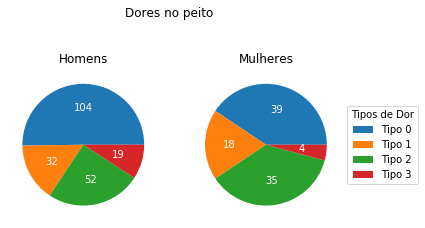

In [7]:
########################
# Inicio do seu codigo #
########################

indice_homens = np.argwhere(dataset['sex'] == 1)
indice_mulheres = np.argwhere(dataset['sex'] == 0)

valores_homens, frequencias_homens = np.unique(dataset['cp'][indice_homens], return_counts=True)
valores_mulheres, frequencias_mulheres = np.unique(dataset['cp'][indice_mulheres], return_counts=True)

labels = ['Tipo 0', 'Tipo 1', 'Tipo 2', 'Tipo 3']

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return absolute

fig, axes = plt.subplots(ncols=2)

axes[0].set_title('Homens')
axes[0].pie(frequencias_homens, autopct=lambda pct: func(pct, frequencias_homens), textprops=dict(color="white"))

axes[1].set_title('Mulheres')
wedges, texts, autotexts = axes[1].pie(frequencias_mulheres, labels=labels, autopct=lambda pct: func(pct, frequencias_mulheres),
                                       textprops=dict(color="white"))

axes[1].legend(wedges, labels, title="Tipos de Dor", loc="center left", bbox_to_anchor=(1.0, 0, 0.5, 1))

fig.suptitle('Dores no peito')

plt.show()

########################
#   Fim do seu codigo  #
########################